# Data Manipulation with Pandas

We've been looking at NumPy and its `ndarray` object

- This provides efficient storage and manipulation of dense typed arrays

Pandas is built on NumPy and provides an efficient implementation of a `DataFrame`

- Convenient storage interface for labelled data.

- Provides powerful data operations familiar to users of database and spreadsheet programs.

NumPy useful for providing essential features for data organization.

It is however limited where flexibility is required:

- attaching labels to data

- working with missing data

- attempting operations that do not map well to element-wise broadcasting e.g grouping

Pandas helps in these "data munging tasks" that occupy much of a data scientist's time.

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

## 1. Basic Data Structures

The main data structures of pandas are `Series` and `DataFrame`, where data are stored and manipulated. A `Series` can simply understood as a (indexed) 1-D numpy array (column) and a `DataFrame` as a table that includes multiple `Series`.

### 1.1 Series Object

To construct a ``Series``, commonly there are two ways but using `>>> pd.Series(data, index=index)`:

- `data` as a list or 1-D array
- `data` as a dictionary

Let's see an example of a student's final exam score for four modules:

In [2]:
# input data as a list
final_exam_score = pd.Series(data = [82, 80, 93, 95],
                             index = ['Math', 'Machine Learning', 'Financial Statistics', 'Python'])
final_exam_score

Math                    82
Machine Learning        80
Financial Statistics    93
Python                  95
dtype: int64

In [3]:
# input data as a dictionary
final_exam_score = pd.Series(data = {'Math': 82, 'Machine Learning': 80, 
                                     'Financial Statistics': 93, 'Python': 95})
final_exam_score

Math                    82
Machine Learning        80
Financial Statistics    93
Python                  95
dtype: int64

To obtain the value of interest:

In [4]:
# Math score
math_score = final_exam_score['Math']
math_score

82

To modify the value of interest:

In [5]:
final_exam_score['Python'] = 60
final_exam_score

Math                    82
Machine Learning        80
Financial Statistics    93
Python                  60
dtype: int64

To slice a set of wanted values:

In [6]:
wanted_subjects = ['Machine Learning', 'Financial Statistics']
wanted_scores = final_exam_score[wanted_subjects]
wanted_scores

Machine Learning        80
Financial Statistics    93
dtype: int64

#### Quiz

Let's assume if we have a set of population data for several countries:

        China      1,412,000,000
        UK             5,637,000
        USA          333,300,000
        Singapore     66,970,000

Please try to:

1. Construct a `Series` object that include the population data shown above.
2. The population for UK and Singapore is incorrectly swapped! Let's swap it back.

In [7]:
population = pd.Series(data = [1412000000, 5637000, 333300000, 66970000], index = ['China', 'UK', 'USA', 'Singapore'])
population

China        1412000000
UK              5637000
USA           333300000
Singapore      66970000
dtype: int64

In [8]:
UK_population = population['Singapore']
population["Singapore"] = population["UK"]
population["UK"] = UK_population
population

China        1412000000
UK             66970000
USA           333300000
Singapore       5637000
dtype: int64

### 1.2 DataFrame Object

Like the `Series` object discussed in the previous section, the `DataFrame` can be thought of either as a n-D NumPy array, or as a specialization of a dictionary.

Following the example of the student's scores, we may want to have an overview breakdowns for all components, including mid-term exam and project scores that may affect the student's final score. A `DataFrame` is a good option to form all the scores in a spreadsheet.

In [9]:
midterm_scores = pd.Series(data = {'Math': 90, 'Machine Learning': 70, 
                                   'Financial Statistics': 88, 'Python': 75})
project_scores = pd.Series(data = {'Math': 75, 'Machine Learning': 85, 
                                   'Financial Statistics': 80, 'Python': 90})

# Create a DataFrame, with column names as keys
scores_overview = pd.DataFrame({'Final': final_exam_score,
                                'Midterm': midterm_scores, 
                                'Project': project_scores})
scores_overview

,Final,Midterm,Project
Math,82,90,75
Machine Learning,80,70,85
Financial Statistics,93,88,80
Python,60,75,90


let's check the index labels:

In [10]:
scores_overview.index

Index(['Math', 'Machine Learning', 'Financial Statistics', 'Python'], dtype='object')

`DataFrame` also have columns attribute:

In [11]:
scores_overview.columns

Index(['Final', 'Midterm', 'Project'], dtype='object')

#### 1.2.1 Indexing and Slicing:
 
To slice the `Project` column as a `Series`:

By refering to the corresponding `DataFrame` attribute:

In [12]:
scores_overview.Project

Math                    75
Machine Learning        85
Financial Statistics    80
Python                  90
Name: Project, dtype: int64

Or by simple indexing (but not recommended in current version of `Pandas`)

In [13]:
scores_overview['Project']

Math                    75
Machine Learning        85
Financial Statistics    80
Python                  90
Name: Project, dtype: int64

Or by `.loc` property (label-location and explicit indexing):

In [14]:
scores_overview.loc[:,'Project']

Math                    75
Machine Learning        85
Financial Statistics    80
Python                  90
Name: Project, dtype: int64

Or by `.iloc` property (integer-location, and implicit indexing):

In [15]:
scores_overview.iloc[:,2]

Math                    75
Machine Learning        85
Financial Statistics    80
Python                  90
Name: Project, dtype: int64

#### Quiz

1. Can you try to access to the project score for Machine Learning?
2. Can you try to slice the mid-term and final scores for financial statistics module?

In [16]:
# By refering to the attribute 'Project'
scores_overview.Project['Machine Learning']
# By simple indexing twice
scores_overview['Project']['Machine Learning']
# or by label-location based indexing
scores_overview.loc['Machine Learning','Project']
# or by integer-location based indexing
scores_overview.iloc[1,2]

85

In [17]:
# By label-location based indexing
scores_overview.loc["Financial Statistics",['Midterm','Final']]
# By integer-location based indexing
scores_overview.iloc[2,[1,0]]

Midterm    88
Final      93
Name: Financial Statistics, dtype: int64

#### 1.2.2 Simple calculations

If we know that the overall score is a weighted sum of the three components, where the weights are:
- Final: 0.6
- Midterm: 0.3
- Project: 0.1

And we want to add a new column named "module score" to calculate the weighted sum:

In [18]:
overall_score = 0.6*scores_overview["Final"] + 0.3*scores_overview["Midterm"] + 0.1*scores_overview["Project"]
scores_overview["overall"] = overall_score
scores_overview

,Final,Midterm,Project,overall
Math,82,90,75,83.7
Machine Learning,80,70,85,77.5
Financial Statistics,93,88,80,90.2
Python,60,75,90,67.5


And then, we want to add a new row to calculate the average score for every components over all modules:

In [19]:
scores_overview.loc['Average'] = scores_overview.mean(axis = 0)
scores_overview

,Final,Midterm,Project,overall
Math,82.00,90.00,75.0,83.700
Machine Learning,80.00,70.00,85.0,77.500
Financial Statistics,93.00,88.00,80.0,90.200
Python,60.00,75.00,90.0,67.500
Average,78.75,80.75,82.5,79.725


#### Quiz

What will happen if we set `axis = 1`?

In [20]:
row_mean = scores_overview.iloc[:4,:].mean(axis = 1)
row_mean

Math                    82.675
Machine Learning        78.125
Financial Statistics    87.800
Python                  73.125
dtype: float64

#### 1.2.3 Column/Row drop

To drop the row of computed Average:

In [21]:
scores_overview.drop('Average', axis = 0, inplace = True)
scores_overview

,Final,Midterm,Project,overall
Math,82.0,90.0,75.0,83.7
Machine Learning,80.0,70.0,85.0,77.5
Financial Statistics,93.0,88.0,80.0,90.2
Python,60.0,75.0,90.0,67.5


#### Quiz

1. What will happen if we set `inplace = False`? Try to drop the column of Overall.

In [22]:
scores_overview.drop('overall', axis = 1, inplace = False)
scores_overview

,Final,Midterm,Project,overall
Math,82.0,90.0,75.0,83.7
Machine Learning,80.0,70.0,85.0,77.5
Financial Statistics,93.0,88.0,80.0,90.2
Python,60.0,75.0,90.0,67.5


#### Note

When you decide the way you are coding, try to think in this way:

In [23]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## 2. Data Loading and Viewing

Pandas supports loading, reading, and writing data from/to various file formats, including CSV, Excel, JSON, SQL, etc. by converting it to a DataFrame. Meanwhile, Pandas provides some basic tools to view the data and their derivatives.

### 2.1 Data Loading

Let's try to load "The Boston Housing Dataset" from a CSV file:

##### Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's


In [24]:
data_path = r".\datasets\BostonHousing.csv"
boston_housing = pd.read_csv(filepath_or_buffer = data_path)

### 2.2 Data Viewing and Data Derivatives

#### 2.2.1 Viewing Data

To view first or last few rows of the `DataFrame`:

In [25]:
# First 5 rows
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
# Last 2 rows
boston_housing.tail(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


#### 2.2.2 Data Derivatives

To transpose the `DataFrame`:

In [27]:
boston_housing_transpose = boston_housing.T
boston_housing_transpose

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
crim,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
zn,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
indus,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,...,9.6900,9.69000,9.69000,9.69000,9.69000,11.93000,11.93000,11.93000,11.93000,11.93000
chas,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
nox,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,...,0.5850,0.58500,0.58500,0.58500,0.58500,0.57300,0.57300,0.57300,0.57300,0.57300
rm,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400,...,5.3900,5.79400,6.01900,5.56900,6.02700,6.59300,6.12000,6.97600,6.79400,6.03000
age,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000,...,72.9000,70.60000,65.30000,73.50000,79.70000,69.10000,76.70000,91.00000,89.30000,80.80000
dis,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210,...,2.7986,2.89270,2.40910,2.39990,2.49820,2.47860,2.28750,2.16750,2.38890,2.50500
rad,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000,...,6.0000,6.00000,6.00000,6.00000,6.00000,1.00000,1.00000,1.00000,1.00000,1.00000
tax,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000,...,391.0000,391.00000,391.00000,391.00000,391.00000,273.00000,273.00000,273.00000,273.00000,273.00000


To get descriptive statistics:

In [28]:
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


And other aggregations like `DataFrame.mean()` you may have seen in last section:

In [29]:
# Max over columns
boston_housing.max()

crim        88.9762
zn         100.0000
indus       27.7400
chas         1.0000
nox          0.8710
rm           8.7800
age        100.0000
dis         12.1265
rad         24.0000
tax        711.0000
ptratio     22.0000
b          396.9000
lstat       37.9700
medv        50.0000
dtype: float64

In [30]:
# numbber of unique values in each column
boston_housing.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [31]:
# number of distinct values for column tax (distinct rows)
boston_housing.tax.value_counts()

tax
666    132
307     40
403     30
437     15
304     14
      ... 
285      1
198      1
256      1
244      1
313      1
Name: count, Length: 66, dtype: int64

In [32]:
# Pairwise correlation of columns
boston_housing.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Quiz

1. Go to Pandas [documentation](https://pandas.pydata.org/docs/reference/index.html), and find antoher `method` for `DataFrame` to perform data viewing.

In [33]:
# variance of each column
boston_housing.var()

crim          73.986578
zn           543.936814
indus         47.064442
chas           0.064513
nox            0.013428
rm             0.493671
age          792.358399
dis            4.434015
rad           75.816366
tax        28404.759488
ptratio        4.686989
b           8334.752263
lstat         50.994760
medv          84.586724
dtype: float64

## 3. Data Manipulation

### 3.1 Conditional Filtering

`DataFrame` support row-wise filtering using complex conditional logics.

To find Median value of owner-occupied homes in $1000's (MEDV) where the per capita crime rate by town (CRIM) is less than 2:

In [34]:
boston_housing.loc[boston_housing.crim < 2, "medv"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 356, dtype: float64

To find the **mean** of full-value property-tax rate per $10,000 (TAX) for those satisfying all conditions below:
- weighted distances to five Boston employment centres (DIS) is more than 6
- index of accessibility to radial highways (RAD) is equal to 5

In [35]:
boston_housing.loc[(boston_housing.dis > 6) & (boston_housing.rad == 5), "tax"].mean()

312.4375

#### Quiz

1. Find the **difference of median** of pupil-teacher ratio by town (PTRATIO) for the two groups satisfying conditons below (Group1 - Group2):
    - Group 1: per capita crime rate by town (CRIM) is less than 1 **and** average number of rooms per dwelling (RM) is between 3 to 6
    - Group 2: per capita crime rate by town (CRIM) is more than 2 **and** average number of rooms per dwelling (RM) is **either** more than 6 **or** less than 3.


In [36]:
condition_group1 = (boston_housing.crim < 1) & (boston_housing.rm < 6) & (boston_housing.rm > 3)
condition_group2 = (boston_housing.crim > 2) & ((boston_housing.rm > 6) | (boston_housing.rm < 3))
median_ptratio_group1 = boston_housing.loc[condition_group1, "ptratio"].median()
median_ptratio_group2 = boston_housing.loc[condition_group2, "ptratio"].median()
median_ptratio_group1 - median_ptratio_group2

-1.0999999999999979

### 3.2 Transformation

Data transformation is very important method in data analytics, and `Pandas` provides easy way to operate row-wise transformation.

#### 3.2.1 Row-wise transformation
For example, if we want to transform the weighted distances to five Boston employment centres (DIS) into log scale, we have at least two approaches:

- `DataFrame.apply()` accepts a function as input to perform row-wise transformation.
- Use Ufunc to perform universial transformation.

In [37]:
# Using .apply() to apply a function to a column
boston_housing.dis.apply(lambda x: np.log(x))
# Or, using Ufucs to apply a function to a column
np.log(boston_housing.dis)

0      1.408545
1      1.602836
2      1.602836
3      1.802073
4      1.802073
         ...   
501    0.907694
502    0.827460
503    0.773574
504    0.870833
505    0.918289
Name: dis, Length: 506, dtype: float64

And we can map the 0-1 variable **CHAS** to a boolean variable simply using `DataFrame.map()`.

In [38]:
boston_housing.chas = boston_housing.chas.map({0: False, 1: True})
boston_housing.chas

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: chas, Length: 506, dtype: bool

#### 3.2.2 Data Binning

Sometimes, binning a continuous variable into a discrete variable is very helpful to extract the key information (e.g., draw a dense bar chart to explore its distribution) and also save computations for further usage.

To encode the Median value of owner-occupied homes in $1000's (MEDV) into different levels:

In [39]:
# Generate a copy of the DataFrame to avoid modifying the original DataFrame
boston_housing_copy = boston_housing.copy()

boston_housing_copy.medv = pd.cut(boston_housing_copy.medv, bins = [0, 15, 25, 35, 40], labels = ['Low', 'Medium', 'High', 'Very High'])
boston_housing_copy

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,False,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Medium
1,0.02731,0.0,7.07,False,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Medium
2,0.02729,0.0,7.07,False,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,False,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,False,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,False,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Medium
502,0.04527,0.0,11.93,False,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Medium
503,0.06076,0.0,11.93,False,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Medium
504,0.10959,0.0,11.93,False,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Medium


Comparison below shows the advantages of binning:

P.S. No worries about the plotting code for now, we will discuss it later.

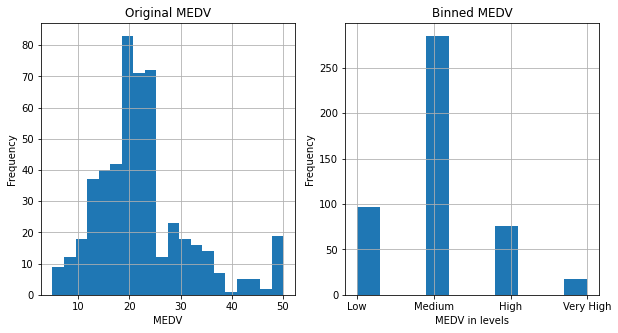

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 2, 1)
ax1 = boston_housing.medv.hist(bins = 20)
ax1.set_title('Original MEDV')
ax1.set_xlabel('MEDV')
ax1.set_ylabel('Frequency')
fig.add_subplot(1, 2, 2)
ax2 = boston_housing_copy.medv.sort_values().hist()
ax2.set_title('Binned MEDV')
ax2.set_xlabel('MEDV in levels')
ax2.set_ylabel('Frequency')
plt.show()

#### Quiz

`String` normally rasies difficulty for computation, so we normally transform it into a numerical value. So, can you convert the MEDV levels into ordered digits (Low: 0, Medium:1, ...)?

In [41]:
level2int_dict = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
boston_housing_copy.medv = boston_housing_copy.medv.map(level2int_dict)
boston_housing_copy.medv

0      1
1      1
2      2
3      2
4      3
      ..
501    1
502    1
503    1
504    1
505    0
Name: medv, Length: 506, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

### 3.3 Grouping for Aggregation, Transformation and Filtration

By “group by” we are referring to a process involving one or more of the following steps:

1. Splitting the data into groups based on some criteria

2. Applying a function to each group independently

3. Combining the results into a data structure

#### 3.3.1 GroupBy Aggregation

Let's try to find out the mean of proportion of owner-occupied units built prior to 1940 (AGE) in different groups of the transformed MEDV levels.

In [42]:
# Firstly, let's convert the 'medv' column back to its string levels
int2level_dict = {v: k for k, v in level2int_dict.items()}
boston_housing_copy.medv = boston_housing_copy.medv.map(int2level_dict)
boston_housing_copy.medv

0         Medium
1         Medium
2           High
3           High
4      Very High
         ...    
501       Medium
502       Medium
503       Medium
504       Medium
505          Low
Name: medv, Length: 506, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [43]:
# Generate a GroupBy object
grouped_medv = boston_housing_copy.groupby('medv')
mean_AGE_grouped = grouped_medv.age.mean()
mean_AGE_grouped

C:\Users\NickMao\AppData\Local\Temp\ipykernel_33112\3362288085.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_medv = boston_housing_copy.groupby('medv')


medv
Low          93.874227
Medium       65.729825
High         50.543421
Very High    56.711765
Name: age, dtype: float64

How about group by both MEDV and CHAS?

In [44]:
grouped_medv_chas = boston_housing_copy.groupby(['medv', 'chas'])
mean_AGE_grouped = grouped_medv_chas.age.mean()
mean_AGE_grouped

C:\Users\NickMao\AppData\Local\Temp\ipykernel_33112\245592681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_medv_chas = boston_housing_copy.groupby(['medv', 'chas'])


medv       chas 
Low        False     93.810417
           True     100.000000
Medium     False     64.547191
           True      83.272222
High       False     48.970588
           True      63.912500
Very High  False     57.018750
           True      51.800000
Name: age, dtype: float64

To generate a contigency table for MEDV and CHAS:

#### Quiz

Can you find the number of `True` in CHAS column and also in the MEDV group "Medium"?

In [45]:
# By using filtering
boston_housing_copy.loc[(boston_housing_copy.medv == 'Medium') & (boston_housing_copy.chas == True), "crim"].count()

18

In [46]:
# Or simply by pd.crosstab
contigency_table = pd.crosstab(boston_housing_copy.medv, boston_housing_copy.chas)
contigency_table

chas,False,True
medv,,
Low,96,1
Medium,267,18
High,68,8
Very High,16,1


In [47]:
# Or using groupby method
contigency_table = grouped_medv_chas.size()
contigency_table

medv       chas 
Low        False     96
           True       1
Medium     False    267
           True      18
High       False     68
           True       8
Very High  False     16
           True       1
dtype: int64

#### 3.3.2 GroupBy Transformation*

Let's try to perform a (z-)standarisation for every MEDV level:

$x^{(i)}_{standarisation} = \frac{x^{(i)} - \bar X}{std(X)}$

In [48]:
grouped_medv.transform(lambda x: (x - x.mean())/x.std())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.466870,0.450886,-1.370640,-0.259189,-0.038435,1.139719,-0.019710,-0.016176,-0.905207,-0.610447,-1.744037,0.404105,-1.479021
1,-0.460567,-0.450535,-0.635692,-0.259189,-0.656553,0.776320,0.489942,0.401509,-0.773313,-0.978912,-0.443266,0.404105,-0.632724
2,-0.272475,-0.874225,0.323626,-0.340733,-0.122172,0.826323,0.375773,0.079748,-0.722881,-0.655570,0.336434,0.289611,-0.868989
3,-0.270186,-0.874225,-0.787640,-0.340733,-0.275047,0.466142,-0.168847,0.594441,-0.515564,-0.852812,0.785890,0.355677,-1.196054
4,-0.527890,-0.825309,-0.827642,-0.242536,-0.322067,-0.199153,-0.092398,0.970290,-0.856936,-0.433957,0.954485,0.808919,-0.129780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.449960,-0.450535,0.114695,-0.259189,0.275102,1.182194,0.125374,-0.783543,-0.905207,-0.767386,1.221720,0.319283,-0.524902
502,-0.455173,-0.450535,0.114695,-0.259189,0.275102,0.066039,0.408100,-0.874547,-0.905207,-0.767386,1.221720,0.404105,-0.644930
503,-0.450521,-0.450535,0.114695,-0.259189,0.275102,2.085973,0.940073,-0.931693,-0.905207,-0.767386,1.221720,0.404105,-1.344752
504,-0.435857,-0.450535,0.114695,-0.259189,0.275102,1.656501,0.876831,-0.826259,-0.905207,-0.767386,1.221720,0.344505,-1.173866


#### 3.3.3 GroupBy Filtering*

GroupBy Filtering `groupby.filter()` can filter elements from groups that don’t satisfy a criterion.

Let's try to filter out the MEDV levels when the mean TAX in this level is less than 250.

In [49]:
# You should see only "Very High" level left
grouped_medv.filter(lambda x: x.tax.mean() < 250)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
4,0.06905,0.0,2.18,False,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,Very High
55,0.01311,90.0,1.22,False,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,Very High
97,0.12083,0.0,2.89,False,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,Very High
179,0.05780,0.0,2.46,False,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,Very High
180,0.06588,0.0,2.46,False,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,Very High
181,0.06888,0.0,2.46,False,0.4880,6.144,62.2,2.5979,3,193,17.8,396.90,9.45,Very High
182,0.09103,0.0,2.46,False,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,Very High
190,0.09068,45.0,3.44,False,0.4370,6.951,21.5,6.4798,5,398,15.2,377.68,5.10,Very High
192,0.08664,45.0,3.44,False,0.4370,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,Very High
226,0.38214,0.0,6.20,False,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,Very High


### 3.4 Data Concatenation

Pandas offers multiple ways to concatenate multiple `DataFrames`, including simple concatenation like we have seen in Numpy, and also joining operation that you may know in SQL.

Let's start with three separated datasets of the Boston Housing Dataset.

In [50]:
boston_housing_p1 = pd.read_csv("./datasets/BostonHousing_part1.csv", index_col= 0)
boston_housing_p1

,crim,zn,indus,chas,nox,rm,age,dis,rad
index,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3
...,...,...,...,...,...,...,...,...,...
395,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24
396,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24
397,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24


In [51]:
boston_housing_p2 = pd.read_csv("./datasets/BostonHousing_part2.csv", index_col= 0)
boston_housing_p2

,tax,ptratio,b,lstat,medv
index,,,,,
1,296,15.3,396.90,4.98,24.0
2,242,17.8,396.90,9.14,21.6
3,242,17.8,392.83,4.03,34.7
4,222,18.7,394.63,2.94,33.4
5,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...
395,666,20.2,396.90,16.35,12.7
396,666,20.2,391.98,17.12,13.1
397,666,20.2,396.90,19.37,12.5


In [52]:
boston_housing_p3 = pd.read_csv("./datasets/BostonHousing_part3.csv", index_col= 0)
boston_housing_p3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
index,,,,,,,,,,,,,,
400,9.91655,0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
401,25.04610,0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
402,14.23620,0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32,7.2
403,9.59571,0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
404,24.80170,0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


#### 3.3.1 Concatenation with `pd.concat`

Let's concatenate the three separated datasets back to a complete Boston Housing Dataset:

In [53]:
boston_housing_hstack = pd.concat([boston_housing_p1, boston_housing_p2], axis = 1)
boston_housing_hstack

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
index,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
396,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1
397,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37,12.5


In [54]:
boston_housing_vstack = pd.concat([boston_housing_hstack, boston_housing_p3], axis = 0)
boston_housing_vstack

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
index,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


#### 3.3.2 Concatenation with `pd.merge()`

`pd.merge()` enables SQL style join types along specific columns. Let's start with two `DataFrame` storing students' scores for Python and Math.

In [55]:
Python_df = pd.DataFrame(data = {'Name': ['Alice', 'Bob', 'Cathy', 'David'], 'Python': [80, 85, 90, 95]})
Python_df

,Name,Python
0,Alice,80
1,Bob,85
2,Cathy,90
3,David,95


In [56]:
Math_df = pd.DataFrame(data = {'Name': ['Bob', 'Cathy', 'David', 'Edward'], 'Math': [85, 90, 95, 100]})
Math_df

,Name,Math
0,Bob,85
1,Cathy,90
2,David,95
3,Edward,100


To left join Python_df with Math_df:

In [57]:
all_scores = pd.merge(Python_df, Math_df, on = 'Name', how = 'left')
all_scores

,Name,Python,Math
0,Alice,80,NaN
1,Bob,85,85.0
2,Cathy,90,90.0
3,David,95,95.0


#### Quiz

What are expected results for `how = 'right'`, `how = 'outer` and `how = 'inner'`?

In [58]:
all_scores = pd.merge(Python_df, Math_df, on = 'Name', how = 'right')
all_scores

,Name,Python,Math
0,Bob,85.0,85
1,Cathy,90.0,90
2,David,95.0,95
3,Edward,NaN,100


In [59]:
all_scores = pd.merge(Python_df, Math_df, on = 'Name', how = 'outer')
all_scores

,Name,Python,Math
0,Alice,80.0,NaN
1,Bob,85.0,85.0
2,Cathy,90.0,90.0
3,David,95.0,95.0
4,Edward,NaN,100.0


In [60]:
all_scores = pd.merge(Python_df, Math_df, on = 'Name', how = 'inner')
all_scores

,Name,Python,Math
0,Bob,85,85
1,Cathy,90,90
2,David,95,95


## 4. Missing Value Processing

- Assumption: the data you will be given is clean and tidy

- Reality: It is usually an utter mess

Before we go further, let's see how the computer save a missing value.

### 4.0 Type of Missing Value

#### 4.0.1 `None`: Pythonic Missing Data

In [61]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Try to run the following cell, what is expected?

In [62]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### 4.0.2 `NaN`: Missing Numerical Data

In [63]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2

array([ 1., nan,  3.,  4.])

Try to run the following cell, what is expected?

In [64]:
vals2.sum()

nan

### 4.1 Detecting null values

Pandas data structures have two useful methods for detecting null data: `isnull()` and `notnull()`. Either one will return a Boolean mask over the data.

Let's read the Boston Housing Dataset with missing values.

In [65]:
boston_housing_missing = pd.read_csv("./datasets/BostonHousing_missing.csv")
boston_housing_missing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,NaN,0.538,6.575,NaN,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,NaN,NaN
2,NaN,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,4.03,34.7
3,NaN,0.0,2.18,0.0,NaN,6.998,NaN,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.90,5.33,36.2


Use `DataFrame.isnull()` to detect missing values:

In [66]:
boston_housing_missing.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,True,True
2,True,False,False,True,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,True,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


A concise way:

In [67]:
boston_housing_missing.isnull().sum()

crim       13
zn         13
indus      18
chas       24
nox        14
rm         13
age        14
dis         6
rad         8
tax         4
ptratio    15
b           5
lstat       5
medv       12
dtype: int64

### 4.2 Dropping or Filling?

In addition to the masking used before, there are the convenience methods, `dropna()` (which removes NA values) and `fillna()` (which fills in NA values):

Before we compare the two methods, let's generate a copy:

In [68]:
boston_housing_missing_copy = boston_housing_missing.copy()

#### 4.2.1 Drop rows with missing values:

In [69]:
boston_housing_missing_copy.dropna(axis = 0, inplace = False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9


#### 4.2.2 Fill null values with `DataFrame.fillna()`:

- by a fixed value (mean, median, ...)
- ffill: propagate last valid observation forward to next valid.
- bfill: use next valid observation to fill gap.

Fill column "CHAS" with `0`:

In [70]:
boston_housing_missing_copy.chas = boston_housing_missing_copy.chas.fillna(value = 0)
boston_housing_missing_copy.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,NaN,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,NaN,NaN
2,NaN,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,4.03,34.7
3,NaN,0.0,2.18,0.0,NaN,6.998,NaN,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.90,5.33,36.2


Fill column "NOX" using `ffill` method:

In [71]:
boston_housing_missing_copy.nox = boston_housing_missing_copy.nox.fillna(method = 'ffill')
boston_housing_missing_copy.head()

C:\Users\NickMao\AppData\Local\Temp\ipykernel_33112\2330477404.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  boston_housing_missing_copy.nox = boston_housing_missing_copy.nox.fillna(method = 'ffill')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,NaN,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,NaN,NaN
2,NaN,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,4.03,34.7
3,NaN,0.0,2.18,0.0,0.469,6.998,NaN,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.90,5.33,36.2


#### Quiz

1. Fill column "LSTAT" with its median
2. Fill column "AGE" using backfill method

In [72]:
boston_housing_missing_copy.lstat = boston_housing_missing_copy.lstat.fillna(value = boston_housing_missing_copy.lstat.median())
boston_housing_missing_copy.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,NaN,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,11.34,NaN
2,NaN,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,4.03,34.7
3,NaN,0.0,2.18,0.0,0.469,6.998,NaN,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.90,5.33,36.2


In [73]:
boston_housing_missing_copy.age = boston_housing_missing_copy.age.fillna(method = 'bfill')
boston_housing_missing_copy.head()

C:\Users\NickMao\AppData\Local\Temp\ipykernel_33112\2247230995.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  boston_housing_missing_copy.age = boston_housing_missing_copy.age.fillna(method = 'bfill')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,78.9,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,11.34,NaN
2,NaN,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,4.03,34.7
3,NaN,0.0,2.18,0.0,0.469,6.998,54.2,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.90,5.33,36.2


#### 4.2.3 Fill null values with `DataFrame.interpolate()`

Interpolation is a more adaptive method that can fill the missing value in a more "smart" way. However, this method is always much more computationally costly.

Fill column "MEDV" with "cubic" interpolation:

P.S. "cubic" interpolation assumes a cubic relationship between known data points. It uses a cubic polynomial to estimate values.

In [74]:
boston_housing_missing_copy.medv = boston_housing_missing_copy.medv.interpolate(method = 'cubic')
boston_housing_missing_copy.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,78.9,4.0900,1.0,296.0,15.3,396.90,4.98,24.000000
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,11.34,35.657178
2,NaN,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,4.03,34.700000
3,NaN,0.0,2.18,0.0,0.469,6.998,54.2,6.0622,3.0,222.0,18.7,394.63,2.94,33.400000
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.90,5.33,36.200000


Fill column "b" with "linear" interpolation:

P.S. "linear" interpolation assumes a linear relationship between known data points. It connects two adjacent points with a straight line and estimates values along that line.

In [75]:
boston_housing_missing_copy.b = boston_housing_missing_copy.b.interpolate(method = 'linear')
boston_housing_missing_copy.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,78.9,4.0900,1.0,296.0,15.3,396.900,4.98,24.000000
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.900,11.34,35.657178
2,NaN,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,395.765,4.03,34.700000
3,NaN,0.0,2.18,0.0,0.469,6.998,54.2,6.0622,3.0,222.0,18.7,394.630,2.94,33.400000
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.900,5.33,36.200000


#### Quiz

1. Fill column "crim" using any interpolation method and justify the reason.

In [76]:
'''
"nearest" method assigns the value of the nearest known data point to the missing value.
This suits the case where the missing value is surrounded by sufficient known data points.
''' 
boston_housing_missing_copy.crim = boston_housing_missing_copy.crim.interpolate(method = "nearest")
boston_housing_missing_copy.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,78.9,4.0900,1.0,296.0,15.3,396.900,4.98,24.000000
1,0.02731,0.0,NaN,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.900,11.34,35.657178
2,0.02731,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,395.765,4.03,34.700000
3,0.06905,0.0,2.18,0.0,0.469,6.998,54.2,6.0622,3.0,222.0,18.7,394.630,2.94,33.400000
4,0.06905,NaN,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,396.900,5.33,36.200000
